In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [ ]:
X_train = pd.read_csv("gisette_train.data",sep=' ',header=None)
y_train = pd.read_csv("gisette_train.labels",sep=' ',header=None)
X_train.dropna(axis=1,how='all',inplace=True)
X_test = pd.read_csv("gisette_valid.data",sep=' ',header=None)
y_test = pd.read_csv("gisette_valid.labels",sep=' ',header=None)
X_test.dropna(axis=1,how='all',inplace=True)

In [ ]:
ss=StandardScaler()
ss.fit(X_train)
tf_X_train=ss.transform(X_train)
tf_X_test=ss.transform(X_test)

print(tf_X_train.shape)

(6000, 5000)


In [ ]:
tf_X_train = tf_X_train.T
tf_X_test = tf_X_test.T
y_train=y_train.replace(-1,0)
y_test=y_test.replace(-1,0)

In [ ]:
theta = np.zeros((5000,1))
cost = []
lamb = 0.0001
eta = 0.1
m  = 6000
p = 5000
mu = 30
k = 30
Niter = 500
for i in range(1,Niter):
  z = np.dot(theta.T, tf_X_train)
  A = 1/(1+(np.exp(-z)))
  cost.append((-1/m) * np.sum(y_train.values.T * np.log(A) + (1 - y_train.values.T) * np.log(1 - A), axis=1) + (lamb/m) * np.sum(theta**2, axis=0))
  theta = theta - (eta * np.dot(tf_X_train, (A.T - y_train.values))/m) - (eta * (lamb/m) * theta)
  temp = (Niter-(2*i))/((2*i*mu)+Niter)
  mi = int(k + ((p-k)*max(0,temp)))
  if mi > k:
    sorted = np.sort(theta,axis=0)
    reverse_sorted = np.flip(sorted, axis=None)
    temp1 = reverse_sorted[0:mi,0]
    for i,lol in enumerate(theta):
      if lol in temp1:
          pass
      else:
          theta[i,0]=0 

  
  

 




Text(0, 0.5, 'Loss')

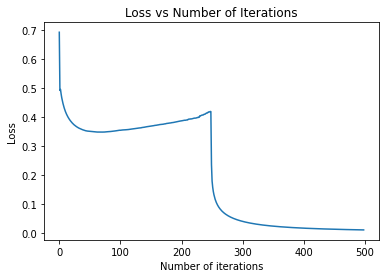

In [ ]:
plt.plot(range(499),cost)
plt.title("Loss vs Number of Iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")

In [ ]:
theta = np.zeros((5000,1))
cost = []
lamb = 0.0001
eta = 0.1
m  = 6000
p = 5000
mu = 30
missclassif_trainlist,missclassif_testlist=[],[]
klist = [10, 30, 100, 300, 500]
Niter = 500
for k in klist:
  for i in range(1,Niter):
    z = np.dot(theta.T, tf_X_train)
    A = 1/(1+(np.exp(-z)))
    cost.append((-1/m) * np.sum(y_train.values.T * np.log(A) + (1 - y_train.values.T) * np.log(1 - A), axis=1) + (lamb/m) * np.sum(theta**2, axis=0))
    theta = theta - (eta * np.dot(tf_X_train, (A.T - y_train.values))/m) - (eta * (lamb/m) * theta)
    temp = (Niter-(2*i))/((2*i*mu)+Niter)
    mi = int(k + ((p-k)*max(0,temp)))
    if mi > k:
      sorted = np.sort(theta,axis=0)
      reverse_sorted = np.flip(sorted, axis=None)
      temp1 = reverse_sorted[0:mi,0]
      for i,lol in enumerate(theta):
        if lol in temp1:
            pass
        else:
            theta[i,0]=0 
  Z_train = np.dot(theta.T,tf_X_train)
  h_x_train = 1/(1+np.exp(-Z_train))
  y_pred_train = np.where(h_x_train<0.5,0,1)
  Z_test = np.dot(theta.T,tf_X_test)
  h_x_test = 1/(1+np.exp(-Z_test))
  y_pred_test = np.where(h_x_test<0.5,0,1)
  missclassif_trainlist.append((1-accuracy_score(y_train,y_pred_train.T))*6000)
  missclassif_testlist.append((1-accuracy_score(y_test, y_pred_test.T))*1000)
  

In [ ]:
temp1 = np.array(missclassif_trainlist)
temp1 = temp1/6000
training_error = temp1*100
temp2 = np.array(missclassif_testlist)
temp2 = temp2/1000
test_error = temp2*100


In [ ]:
training_error


array([0., 0., 0., 0., 0.])

In [ ]:
test_error

array([2.2, 2.2, 2.9, 3.2, 3.3])

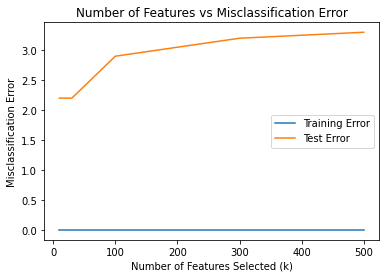

In [ ]:
plt.plot(klist,training_error,label='Training Error')
plt.plot(klist,test_error,label='Test Error')
plt.title('Number of Features vs Misclassification Error')
plt.xlabel("Number of Features Selected (k)")
plt.ylabel("Misclassification Error")
plt.legend()


 **REMOVE THIS BEFORE UPLOAD**

In [ ]:
theta = np.zeros((5000,1))
cost = []
lamb = 0.0001
eta = 0.001
m  = 6000
p = 5000
mu = 30
k = 10
Niter = 500
for i in range(1,Niter):
  z = np.dot(theta.T, tf_X_train)
  A = 1/(1+(np.exp(-z)))
  cost.append((-1/m) * np.sum(y_train.values.T * np.log(A) + (1 - y_train.values.T) * np.log(1 - A), axis=1) + (lamb/m) * np.sum(theta**2, axis=0))
  theta = theta - (eta * np.dot(tf_X_train, (A.T - y_train.values))/m) - (eta * (lamb/m) * theta)
  temp = (Niter-(2*i))/((2*i*mu)+Niter)
  mi = int(k + ((p-k)*max(0,temp)))



In [ ]:
  if mi > k:
    sorted = np.sort(theta,axis=0)
    reverse_sorted = np.flip(sorted, axis=None)
    temp1 = reverse_sorted[0:mi,0]
    for i,lol in enumerate(theta):
      if lol in temp1:
          pass
      else:
          theta[i,0]=0 

Text(0, 0.5, 'Loss')

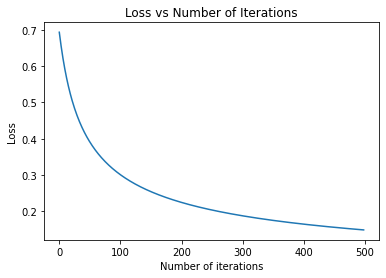

In [ ]:
plt.plot(range(499),cost)
plt.title("Loss vs Number of Iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")